x_train has shape: (2000, 3)
x_test has shape: (1018, 3)


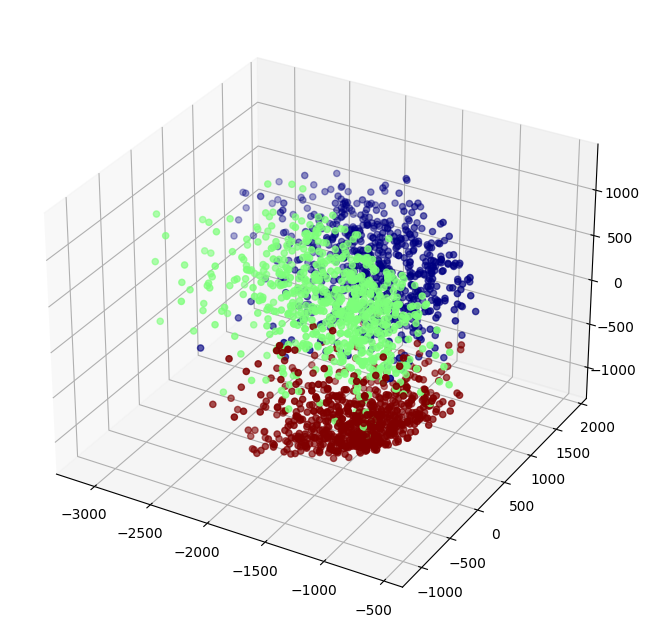

In [1]:
### 1a
### Load the dataset (which is saved as a pickle file)
import numpy as np
import matplotlib.pyplot as plt
import pickle

with open('activity15dataset.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    x_train, y_train, x_test, y_test  = pickle.load(f)

# Note that each data point is a row    
print('x_train has shape:', np.shape(x_train))
print('x_test has shape:', np.shape(x_test))

### Interactive scatter plot of dataset
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], x_train[:,2], c=y_train, cmap='jet')
plt.show()

In [18]:
### 1b
### compute the mean of the three classes, return a column vector

# complete the code below
# hint 1 -- x_train[y_train==1,:] for example will extract only the elements from x_train that correspond to class 1
# hint 2 -- np.mean(blah, axis=0) will take the mean of each row
# hint 3 -- reshape your vector so that it's a column vector
mu_0 = np.mean(x_train[y_train==0,:],axis=0).reshape(-1,1) #complete me to return 3 by 1 numpy array 
mu_1 = np.mean(x_train[y_train==1,:],axis=0).reshape(-1,1) #complete me to return 3 by 1 numpy array 
mu_2 = np.mean(x_train[y_train==2,:],axis=0).reshape(-1,1) #complete me to return 3 by 1 numpy array 

### compute covariance of each class
### np.cov() expects each column to be a single datapoint
cov_0 = np.cov(x_train[y_train==0,:].T) #complete me to return 3 by 3 numpy array 
cov_1 = np.cov(x_train[y_train==1,:].T) #complete me to return 3 by 3 numpy array 
cov_2 = np.cov(x_train[y_train==2,:].T) #complete me to return 3 by 3 numpy array 
print(np.shape(mu_0))
print(np.shape(cov_1))

(3, 1)
(3, 3)


In [19]:
### 1c
### complete the code below to compute the log-likelihood ratio under all three classes
def log_likelihood(_x, _mu, _cov):
    ## _x and _mu should be column vectors, and _cov should be an n \times n matrix
    assert np.shape(_x) == np.shape(_mu)

    ####### COMPLETE THIS LINE OF CODE
    shift = _x-_mu
    _log_likelihood = - 0.5*np.log(np.linalg.det(_cov)) - 0.5*(shift.T@np.linalg.inv(_cov)@shift)
    ######################## 
    
    return _log_likelihood[0,0]

In [20]:
### 1d
from sklearn.metrics import classification_report

### predict the class of the vectors in the test set
y_hat = []
for i, x in enumerate(x_test):
    x_column_vector = np.reshape(x,(-1,1))
    ll0 = log_likelihood(x_column_vector, mu_0, cov_0)
    ll1 = log_likelihood(x_column_vector, mu_1, cov_1)
    ll2 = log_likelihood(x_column_vector, mu_2, cov_2)
    y_hat.append(np.argmax([ll0, ll1, ll2]))
    
### compute the accuracy and print a classification report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       341
           1       0.90      0.96      0.93       336
           2       0.97      0.95      0.96       341

    accuracy                           0.94      1018
   macro avg       0.95      0.95      0.95      1018
weighted avg       0.95      0.94      0.95      1018



(1000, 3)


<IPython.core.display.Javascript object>


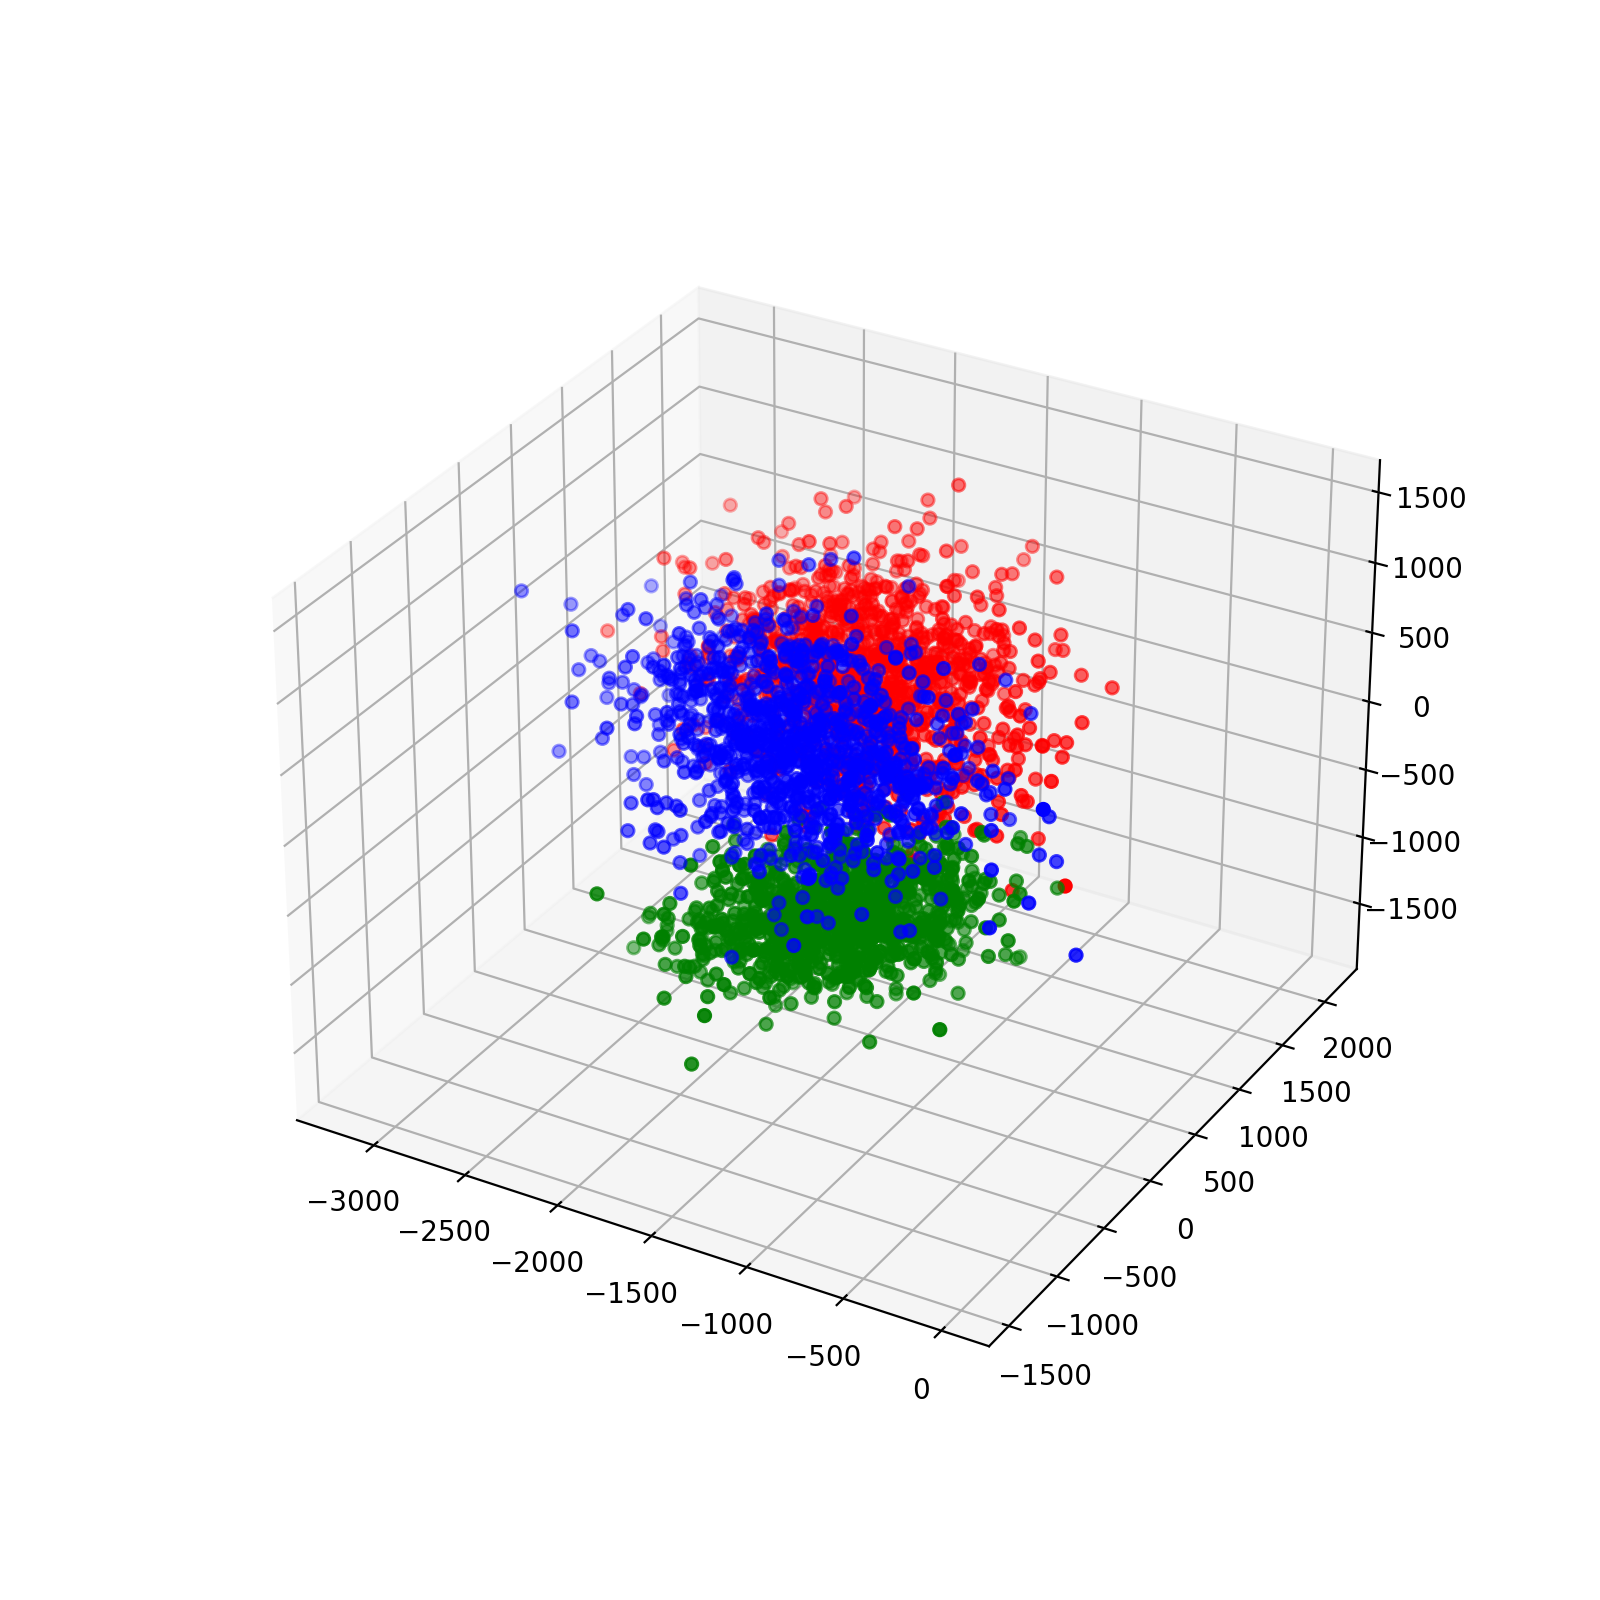

/tmp/ipykernel_6168/2634504672.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x_0[:,0], x_0[:,1], x_0[:,2], c='r', cmap='jet')
/tmp/ipykernel_6168/2634504672.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x_1[:,0], x_1[:,1], x_1[:,2], c='b', cmap='jet')
/tmp/ipykernel_6168/2634504672.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x_2[:,0], x_2[:,1], x_2[:,2], c='g', cmap='jet')


In [21]:
### create data points from three classes, and plot for comparison

x_0 = np.random.multivariate_normal(mu_0.squeeze(), cov_0, 1000)
x_1 = np.random.multivariate_normal(mu_1.squeeze(), cov_1, 1000)
x_2 = np.random.multivariate_normal(mu_2.squeeze(), cov_2, 1000)
print(np.shape(x_0))

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_0[:,0], x_0[:,1], x_0[:,2], c='r', cmap='jet')
ax.scatter(x_1[:,0], x_1[:,1], x_1[:,2], c='b', cmap='jet')
ax.scatter(x_2[:,0], x_2[:,1], x_2[:,2], c='g', cmap='jet')